# AS 3.1 Moonlander assignement
***By Joris Heemskerk & Bas de Blok***

This notebook contains all the code required to train and run the moonlander algoritm

## 1. Base assignment

The base assignment is to implement an object-oriented Deep Q-learning Network in Python. This network will be trained on the Lunar Lander enviornment.

### 1.1. Imports

In [1]:
from agent import Agent
from policy import Policy
from action import Action
from state import State
from memory import Memory
from qNetwork import QNetwork

import copy
import torch
import gymnasium as gym
from torch import nn
import datetime

### 1.3. Defining the network

In [2]:
policy = Policy(network=QNetwork(), epsilon=1, decay=.996)

memory = Memory(max_size=30_000)

agent = Agent(policy=policy, memory=memory)

env = gym.make("LunarLander-v2", render_mode="human")
agent.run(env)
agent.policy.save(f"saved_models/before_{datetime.datetime.now()}")
env.close()

Using cuda device



In [3]:
env = gym.make("LunarLander-v2")
agent.train(
    environment=env,
    n_iterations=5000,
    gamma=0.99,
    memory_batch_size=32,
    batch_size=32,
    steps_limit=200_000_000_000_000_000_000,
    loss_fn=nn.MSELoss(),
    optimizer=torch.optim.Adam,
    n_episodes=1,
    seed=42,
    )
agent.policy.save(f"saved_models/after_{datetime.datetime.now()}")
env.close()

iteration : 100%|██████████| 5000/5000 [35:40<00:00,  2.34it/s]


1.9801227728069924e-09


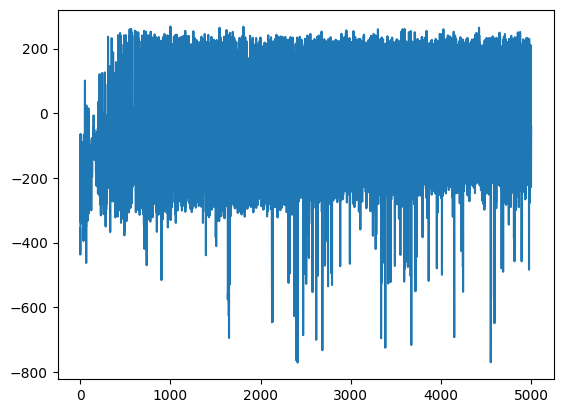

In [4]:
print(agent.policy.epsilon)
agent.plot()

In [5]:
env = gym.make("LunarLander-v2", render_mode="human")
print(agent.run(env))
env.close()

-15.842303375003368


# Overig:

In [6]:
# class QNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(8, 150),
#             nn.ReLU(),
#             nn.Linear(150, 120),
#             nn.ReLU(),
#             nn.Linear(120, 4),
#         )
#         self.device = (
#             "cuda"if torch.cuda.is_available()
#             else 
#                 "mps" if torch.backends.mps.is_available()
#             else 
#                 "cpu"
#         )
#         self.to(self.device)
#         print(f"Using \033[32m{self.device }\033[0m device\n")

#     def forward(self, x: torch.Tensor)-> torch.Tensor:
#         x = x.to(self.device)
#         print(f"{x = }, {type(x) = }")
#         logits = self.linear_relu_stack(x)
#         print(f"{logits = }, {type(logits) = }")
#         return logits
    
#     def train_model(
#         self, 
#         train_loader: torch.utils.data.DataLoader, 
#         loss_fn: nn.Module, 
#         optimizer: torch.optim, 
#         num_epochs: int
#     ):
#         for epoch in range(num_epochs):
#             print(f"-------------------------------\nEpoch {epoch+1}")
#             for batch, (X, y) in tqdm(enumerate(train_loader), total=len(train_loader)):
#                 X, y = X.to(self.device), y.to(self.device)
                
#                 # Compute prediction and loss
#                 pred = self.forward(X)
#                 print("done predicting. Now going to calculate loss")
#                 loss = loss_fn(pred, y)

#                 print("done with loss, going for grad")
#                 # Backpropagation
#                 optimizer.zero_grad()
#                 print("done with zero grad, going for backwards")
#                 loss.backward()
#                 print("done with backwards, going for step")
#                 optimizer.step()
#                 print("done with step")

#                 if batch % 100 == 0:
#                     loss, current = loss.item(), batch * len(X)
#         print("Training done!")

In [7]:
# policy = Policy(network=QNetwork(), epsilon=6.090)
# memory = Memory(max_size=3_000)

# agent = Agent(policy=policy, memory=memory)

# env = gym.make("LunarLander-v2", render_mode="human")
# agent.run(env)
# env.close()

In [8]:
# env.close()

In [9]:
# X_train = torch.randn(100000, 8)  # 1000 samples, 8 features each
# y_train = torch.randint(0, 4, (100000,))

# train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# model = QNetwork()

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# model.train_model(train_loader, criterion, optimizer, 1)

In [10]:
# device = (
#     "cuda"if torch.cuda.is_available()
#     else 
#         "mps" if torch.backends.mps.is_available()
#     else 
#         "cpu"
# )
# print(f"Using \033[32m{device}\033[0m device\n")

# model = QNetwork().to(device)
# print(model)

### 1.4. Defining the agent

### 1.5. Training the model

### 1.6. Testing the model

In [11]:
# env = gym.make("LunarLander-v2", render_mode="human")
# observation, info = env.reset(seed=42)
# i = 0
# while True:
#    i += 1
#    action = env.action_space.sample()  # this is where you would insert your policy
#    # print(action)
#    observation, reward, terminated, truncated, info = env.step(action)
#    # print(f"Step\n\t{observation = }\n\t{reward = }\n\t{terminated = }\n\t{truncated = }\n\t{info = }")

#    if terminated or truncated:
#       break
# print(i)
# env.close()

In [2]:
from agent import Agent
from policy import Policy
from action import Action
from state import State
from memory import Memory
from qNetwork import QNetwork

import copy
import torch
import gymnasium as gym
from torch import nn
import datetime

policy = Policy(network=QNetwork(), epsilon=0.01, decay=.996)

memory = Memory(max_size=30_000)

agent = Agent(policy=policy, memory=memory)

env = gym.make("LunarLander-v2", render_mode="human")
agent.policy.load(f"saved_models/after_2024-06-24 16:11:54.077137")
agent.run(env)
env.close()


Using cuda device

